In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

After loading the required libraries for data analysis and data visualisation, I am now going to load the 3 datasets. 

I am going to start with the main dataset which shows the proportion (percentage and number) of London borough residents' jobs that were paid below London Living Wage from 2008 to 2024. I am skipping the first 2 rows because the data starts on the third line of the CSV file.

In [25]:
main_df = pd.read_csv("london_borough_low_pay.csv", skiprows=2,
                      na_values=['NA', ''],
                      skip_blank_lines=True)

Next, I am going to load the dataset that shows the proportion (percentage and number) of London borough residents' jobs that were paid below London Living Wage grouped by sex (male and female) in 2024.

In [26]:
sex_df = pd.read_csv('london_borough_low_pay_by_sex.csv', skiprows=2,
                     na_values=['NA', ''],
                     skip_blank_lines=True)

The third and final dataset I am loading shows the proportion (percentage and number) of London borough residents' jobs that were paid below London Living Wage grouped by employment type (full-time worker and part-time worker) in 2024.

In [27]:
employment_df = pd.read_csv('london_borough_low_pay_by_employment.csv', skiprows=2,
                            na_values=['NA', ''],
                            skip_blank_lines=True)

I am going to write a data cleaning function that removes empty rows and columns, removes any whitespace from column names and values and also removes the rows after the data showing the metadata like notes, chart and data source, and the weblink.

In [30]:
def clean_dataframe(df):
    df = df.dropna(axis=1, how='all') # Removes any empty columns (axis=1 refers to columns as axis=0 referring to rows is the default)
    df = df.dropna(how='all') # Removes any empty rows
    df.columns = df.columns.str.strip() # Removes whitespace from column name and values
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = df[column].str.strip() if df[column].dtype == "object" else df[column]
    # Removes rows after data showing notes, data source, chart source and weblink to data
    df = df[df['Borough'].notna()]
    df = df[~df['Borough'].str.contains('Note:|Data source:|Chart source:|http|London|Profile', na=False)]
    return df

In [31]:
main_df = clean_dataframe(main_df)
sex_df = clean_dataframe(sex_df)
employment_df = clean_dataframe(employment_df)

I am now going to convert the percentage columns in all 3 dataframes into a numeric format.

In [32]:
def convert_percentages(df):
    percentage_columns = [column for column in df.columns if 'Percentage' in column]
    for column in percentage_columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

In [33]:
def convert_numbers(df):
    number_columns = [column for column in df.columns if 'Number' in column]
    for column in number_columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

In [34]:
main_df = convert_percentages(main_df)
main_df = convert_numbers(main_df)
sex_df = convert_percentages(sex_df)
sex_df = convert_numbers(sex_df)
employment_df = convert_percentages(employment_df)
employment_df = convert_numbers(employment_df)

I am now going to write a function to verify each dataset has been cleaned by printing out the data of the dataframes.

In [35]:
def verify_dataframe(df, name):
    print(f"\nVerifying {name}:")
    print("\nShape:", df.shape)
    print("\nColumns:", df.columns.tolist())
    print("\nData types:")
    print(df.dtypes)
    print("\nFirst few rows:")
    print(df.head())
    print("\nMissing values:")
    print(df.isnull().sum())
    print("\nUnique boroughs:")
    print(df['Borough'].unique())

In [36]:
verify_dataframe(main_df, "Main historical dataset")
verify_dataframe(sex_df, "Dataset by sex")
verify_dataframe(employment_df, "Dataset by employment type")


Verifying Main historical dataset:

Shape: (32, 35)

Columns: ['Borough', 'Percentage of low-paid jobs (2008)', 'Percentage of low-paid jobs (2009)', 'Percentage of low-paid jobs (2010)', 'Percentage of low-paid jobs (2011)', 'Percentage of low-paid jobs (2012)', 'Percentage of low-paid jobs (2013)', 'Percentage of low-paid jobs (2014)', 'Percentage of low-paid jobs (2015)', 'Percentage of low-paid jobs (2016)', 'Percentage of low-paid jobs (2017)', 'Percentage of low-paid jobs (2018)', 'Percentage of low-paid jobs (2019)', 'Percentage of low-paid jobs (2020)', 'Percentage of low-paid jobs (2021)', 'Percentage of low-paid jobs (2022)', 'Percentage of low-paid jobs (2023)', 'Percentage of low-paid jobs (2024)', 'Number of low-paid jobs (2008)', 'Number of low-paid jobs (2009)', 'Number of low-paid jobs (2010)', 'Number of low-paid jobs (2011)', 'Number of low-paid jobs (2012)', 'Number of low-paid jobs (2013)', 'Number of low-paid jobs (2014)', 'Number of low-paid jobs (2015)', 'Number

I am now going to save the cleaned dataframes into a new CSV file.

In [37]:
main_df.to_csv('cleaned_main.csv', index=False)
sex_df.to_csv('cleaned_sex.csv', index=False)
employment_df.to_csv('cleaned_employment.csv', index=False)

I am now going to plot the historical trends (low pay across London boroughs from 2008 to 2024) that is seen in the first main dataframe and I am going to use Seaborn as the library to plot the line graph. I have chosen Seaborn because compared to Matplotlib, it is more detailed (it lets you use set styles and has Pandas integrations so I can add my dataframe or create a new dataframe for the graph.)

([<matplotlib.axis.XTick at 0x25ece127c50>,
 [Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022'),
  Text(2023, 0, '2023'),
  Text(2024, 0, '2024')])

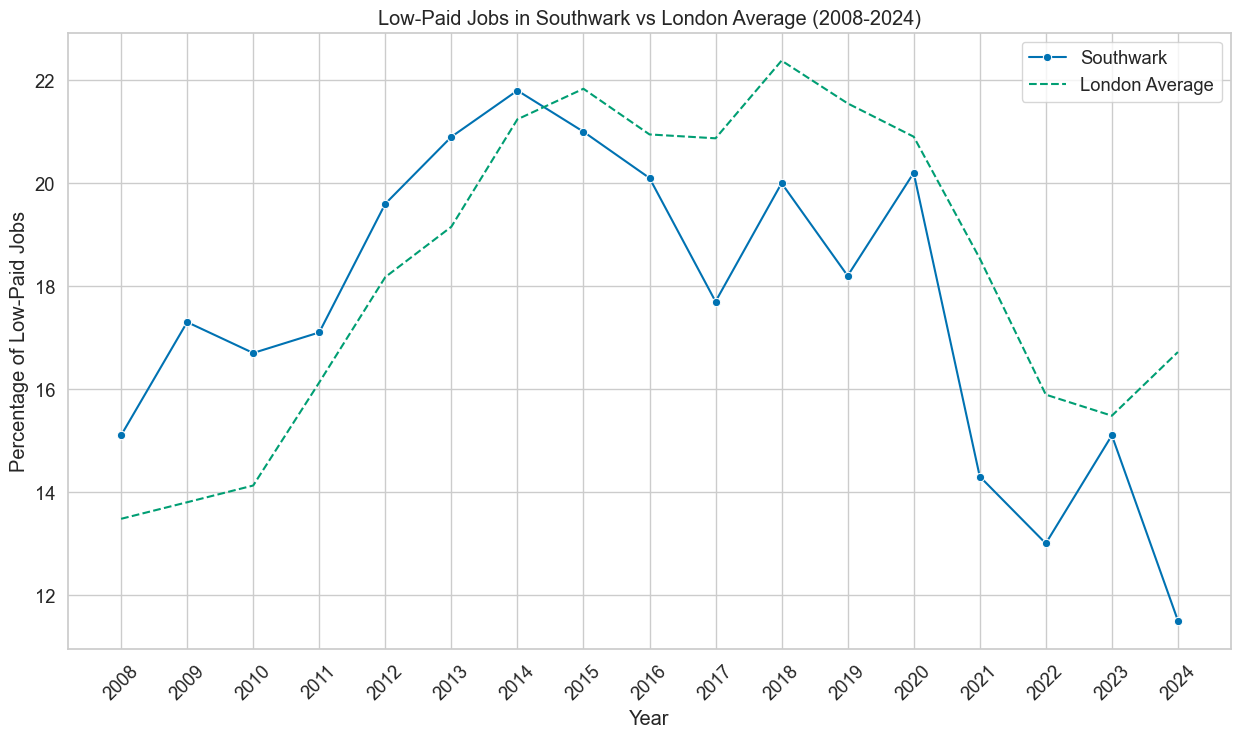

In [ ]:
sns.set_style("whitegrid") 
sns.set_context("notebook", font_scale=1.2)
plt.figure(figsize=(15, 8))

southwark_data = main_df[main_df['Borough'] == 'Southwark']
year_columns = [column for column in main_df.columns if 'Percentage' in column]
years = [int(year[-5:-1]) for year in year_columns]

plot_data = pd.DataFrame({
    'Year': years,
    'Southwark': southwark_data[year_columns].values.flatten(),
    'London Average': main_df[year_columns].mean().values
})

sns.lineplot(data=plot_data, x='Year', y='Southwark', marker='o', label='Southwark')
sns.lineplot(data=plot_data, x='Year', y='London Average', linestyle='--', label='London Average')

plt.title('Low-Paid Jobs in Southwark vs London Average (2008-2024)')
plt.xlabel('Year')
plt.ylabel('Percentage of Low-Paid Jobs')
plt.xticks(years, rotation=45)